# Projeto de Análise e Limpeza de Dados 

Autor: Bruna Namie Yamasaki

O dataset a ser analisado possui informações a respeito dos atletas que já participaram de jogos olímpicos

Descrição do dataset: 


1. ID - Um número de identificação único de cada atleta
2. Name - Nome do atleta
3. Sex - Gênero do atleta: M (masculino) ou F (feminino)
4. Age - Idade
5. Height - Altura em centímetros
6. Weight - Peso em kg
7. Team - Nome do time ao qual o atleta pertence
8. NOC - Nome do comitê olímpico nacional ao qual o atleta pertence, sempre
será um código de 3 letras (BRA para Brasil, USA para Estados Unidos, etc.)
9. Games - Ano e época dos jogos
10. Year - Ano da edição que o atleta participou
11. Season - Estação na qual ocorreu os jogos Summer (verão) ou Winter (inverno)
12. City - Cidade onde ocorreu a edição dos jogos
13. Sport - Esporte do atleta
14. Event - Especificação a respeito da categoria do esporte (Ex. Futebol
masculino, vôlei feminino, corrida 500m, etc.)
15. Medal - Medalha ganha pelo atleta: Gold (ouro), Silver (prata), Bronze, ou NA (nenhuma medalha)





## Setup

Para começar, alguns pacotes devem ser importados:


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Agora, já é possível ler o dataset utilizando o seguinte comando:

In [251]:
df = pd.read_csv("df_athlete_events.csv")

Para começar a análise do dataset, é necessário entender como ele é estruturado:

In [252]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


Com esse primeiro comando, já se pode ter uma noção geral de como o nosso dataset está organizado, como o nome das colunas e alguns dados.

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


Já com esse segundo comando, pode-se perceber os tipos de dados de cada coluna, assim como que nem todas as colunas possuem dados em todas as linhas. 

Por exemplo, com essa análise, quase todas as colunas possuem 45567 itens, com exceção de "Age", "Height", "Weight" e "Medal".

In [254]:
df.describe()

,Athlete_ID,Age,Height,Year
count,45567.000000,44594.000000,3.554700e+04,45567.000000
mean,69129.286282,25.851348,9.729939e+02,1972.391094
std,38866.485546,5.966053,3.446781e+04,94.200678
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,1952.000000
50%,68634.000000,25.000000,1.780000e+02,1984.000000
75%,103181.000000,29.000000,1.850000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


Esse comando, por sua vez, também ajuda a entender o dataset, mas trazendo outras informações. Ela mostra alguns dados estatísticos sobre algumas colunas (as numéricas, ou seja, aquelas que possuem dados numéricos), como média, desvio padrão, valor mínimo e máximo...

Mas antes de começar a obtenção de insights, vamos organizar e limpar os dados.

## Dados categóricos

Primeiramente, vamos visualizar quais são os tipos de dados de cada coluna categórica:

In [255]:
df["Name"].unique()

array(['Edgar Lindenau Aabye', 'Per Knut Aaland', 'Arvo Ossian Aaltonen',
       ..., 'Galina Ivanovna Zybina (-Fyodorova)', 'Bogusaw Zych',
       'Olesya Nikolayevna Zykina'], dtype=object)

In [256]:
df["Sex"].unique()

array(['M', 'MALE', 'FEMALE', 'F', 'Vic vai te dar um socao',
       'P&D >> Comunidade'], dtype=object)

In [257]:
df["Team"].unique()

array(['Denmark/Sweden', 'United States', 'Finland', 'Norway',
       'Netherlands', 'Taifun', 'France', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Argentina', 'Belarus', 'Cameroon', 'Hungary',
       'Thessalonki-1', 'Australia', 'Egypt', 'Iran', 'Canada',
       'Pakistan', 'Soviet Union', 'Uzbekistan', 'Tajikistan',
       'Unified Team', 'Japan', 'Ethiopia', 'Switzerland', 'East Germany',
       'Germany', 'Monaco', 'Fornebo', 'Vesper Boat Club', 'Sweden',
       'South Africa', 'Turkey', 'Bulgaria', 'Great Britain', 'Poland',
       'Djibouti', 'Jordan', 'Romania', 'Cuba', 'Puerto Rico',
       'Venezuela', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Switzerland-1', 'Switzerland-2', 'Uruguay', 'Denmark',
       'Czechoslovakia', 'Nigeria', 'Kenya', 'Brazil', 'France-1',
       'Germany-2', 'Austria', 'Lithuania', 'Belgium', 'Stella-2',
       'United States-1', 'West Germany',
       'Large boat, Central Naval Prep School "Poros"-1', 'Benin',
       'Panama', 'El S

In [258]:
df["NOC"].unique()

array(['DEN', 'USA', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE',
       'RUS', 'ARG', 'BLR', 'CMR', 'HUN', 'GRE', 'AUS', 'EGY', 'IRI',
       'CAN', 'PAK', 'URS', 'UZB', 'TJK', 'EUN', 'JPN', 'ETH', 'SUI',
       'GDR', 'GER', 'MON', 'SWE', 'RSA', 'TUR', 'BUL', 'GBR', 'POL',
       'DJI', 'JOR', 'ROU', 'CUB', 'PUR', 'VEN', 'MEX', 'GHA', 'MAR',
       'NZL', 'URU', 'TCH', 'NGR', 'KEN', 'BRA', 'AUT', 'LTU', 'BEL',
       'FRG', 'BEN', 'PAN', 'ESA', 'INA', 'MAS', 'KOR', 'CHI', 'MTN',
       'UKR', 'SCG', 'UGA', 'IRQ', 'SYR', 'QAT', 'KUW', 'OMA', 'PLE',
       'IOA', 'KSA', 'UAE', 'CRO', 'COL', 'ARM', 'SRB', 'ISL', 'NIG',
       'ISV', 'PNG', 'SUD', 'IND', 'BIH', 'ALG', 'JAM', 'TTO', 'CIV',
       'PHI', 'LUX', 'POR', 'BOT', 'ROT', 'TUN', 'PRK', 'CHN', 'YUG',
       'MAD', 'GUY', 'KAZ', 'ISR', 'IRL', 'IVB', 'DOM', 'GEO', 'EST',
       'HAI', 'CZE', 'AFG', 'SVK', 'SAA', 'PAR', 'BAH', 'ANZ', 'MNE',
       'GUA', 'AND', 'ANG', 'SLO', 'TAN', 'BER', 'LIB', 'MRI', 'ALB',
       'KGZ', 'BAR',

In [259]:
df["Games"].unique()

array(['1900 Summer', '1992 Winter', '1920 Summer', '2014 Winter',
       '1948 Summer', '1952 Summer', '1994 Winter', '2002 Winter',
       '2006 Winter', '2008 Summer', '1988 Summer', '1996 Summer',
       '1952 Winter', '1960 Winter', '1912 Summer', '1956 Summer',
       '2016 Summer', '2000 Summer', '2012 Summer', '2004 Summer',
       '1980 Summer', '1984 Summer', '1992 Summer', '1936 Summer',
       '1906 Summer', '1964 Summer', '1960 Summer', '1972 Summer',
       '1924 Summer', '1924 Winter', '1904 Summer', '1932 Summer',
       '1928 Winter', '1998 Winter', '1988 Winter', '1968 Winter',
       '1976 Summer', '2010 Winter', '1908 Summer', '1928 Summer',
       '1968 Summer', '1972 Winter', '1980 Winter', '1984 Winter',
       '1936 Winter', '1956 Winter', '1976 Winter', '1964 Winter',
       '1948 Winter', '1932 Winter', '1896 Summer'], dtype=object)

In [260]:
df["City"].unique()

array(['Paris', 'Albertville', 'Antwerpen', 'Sochi', 'London', 'Helsinki',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Seoul',
       'Atlanta', 'Oslo', 'Squaw Valley', 'Stockholm', 'Melbourne',
       'Rio de Janeiro', 'Sydney', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Tokyo', 'Roma', 'Munich', 'Chamonix',
       'St. Louis', 'Sankt Moritz', 'Nagano', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Mexico City', 'Sapporo',
       'Lake Placid', 'Sarajevo', 'Garmisch-Partenkirchen',
       "Cortina d'Ampezzo", 'Innsbruck', '######'], dtype=object)

In [261]:
df["Season"].unique()

array(['Summer', 'Winter', '#ForaBolsonaro', 'Ele nunca', 'Ele não'],
      dtype=object)

In [262]:
df["Sport"].unique()

array(['Tug-Of-War', 'Cross Country Skiing', 'Swimming', 'Ice Hockey',
       'Gymnastics', 'Alpine Skiing', 'Handball', 'Hockey', 'Rowing',
       'Football', 'Speed Skating', 'Sailing', 'Cycling', 'Fencing',
       'Taekwondo', 'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball',
       'Volleyball', 'Boxing', 'Basketball', 'Nordic Combined',
       'Baseball', 'Diving', 'Shooting', 'Freestyle Skiing', 'Bobsleigh',
       'Equestrianism', 'Curling', 'Judo', 'Tennis', 'Badminton',
       'Rugby Sevens', 'Rhythmic Gymnastics', 'Weightlifting',
       'Beach Volleyball', 'Ski Jumping', 'Rugby',
       'Short Track Speed Skating', 'Archery', 'Biathlon', 'Lacrosse',
       'Synchronized Swimming', 'Triathlon', 'Polo', 'Luge',
       'Table Tennis', 'Art Competitions', 'Snowboarding', 'Cricket',
       'Skeleton', 'Racquets', 'Military Ski Patrol', 'Croquet', 'Roque',
       'Alpinism', 'Trampolining', 'Basque Pelota', 'Motor

In [263]:
df["Event"].unique()

array(["Tug-Of-War Men's Tug-Of-War",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom", "Alpine Skiing Men's Downhill",
       "Alpine Skiing Men's Combined", "Handball Women's Handball",
       "Gymnastics Men's Team All-Around, Free System",
       "Hockey Women's Hockey", "Rowing Men's Lightweight Double Sculls",
       "Football Women's Football", "Speed Skating Men's 1,500 metres",
       'Sailing Mixed 8 metres', "Cycling Men's Road Race, Team",
       "Rowing Men's Coxless Pairs", "Fencing Men's epee, Individual",
       "Taekwondo Women's Flyweight", "Athletics Women's Javelin Throw",
       "Swi

In [264]:
df["Medal"].unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

Com esses comandos acima, podem ser percebidos quais dessas colunas possuem dados que fogem do "escopo", como a coluna "Sex" que possui apenas 2 tipos de dados (feminino e masculino) na teoria, mas que possui 6 tipos no dataset, a coluna "Season" que possui dados como "#ForaBolsonaro" e a coluna "Medal", que possui uma medalha diferenciada: "Nelson". 

Dessa forma, é necessário fazer algumas manipulações para que elas não induzam em insights equivocados.

Começando pela coluna "Sex" :

In [265]:
df["Sex"].value_counts()

M                          31664
F                          11728
MALE                         765
FEMALE                       765
P&D >> Comunidade            333
Vic vai te dar um socao      312
Name: Sex, dtype: int64

Com isso, percebe-se que como a maior parte dos dados dessa coluna são "M" ou "F", as outras devem ser alocadas para uma ou outra. Um ponto que deve ser observado são os últimos 2 tipos de dados, para onde devem ser alocados? Eles devem ser excluídos?

Pela intuição, podemos alocar FEMALE para F e MALE para M.

Já para os últimos dois tipos, como eles são números muito próximos (333 e 312) em relação ao número total de itens e também é possível alocá-los.

In [266]:
df["Sex"].replace("MALE", "M", inplace=True)
df["Sex"].replace("FEMALE", "F", inplace=True)
df["Sex"].replace("P&D >> Comunidade", "M", inplace=True)
df["Sex"].replace("Vic vai te dar um socao", "F", inplace=True)

Para confirmar o que foi feito:

In [267]:
df["Sex"].value_counts()

M    32762
F    12805
Name: Sex, dtype: int64

Para a coluna de cidades, percebeu-se que há um dado "######" e como só existem 134 linhas com esses dados, pode-se excluí-los, pois eles são menos de 1% do total.

In [268]:
df["City"].value_counts()

London                    4091
Athina                    2886
Los Angeles               2379
Beijing                   2310
Rio de Janeiro            2301
Sydney                    2267
Atlanta                   2124
Barcelona                 1983
Seoul                     1839
Paris                     1589
Montreal                  1522
Moskva                    1521
Munich                    1407
Antwerpen                 1376
Mexico City               1242
Tokyo                     1198
Roma                      1076
Helsinki                  1074
Stockholm                 1070
Berlin                    1036
Melbourne                  963
Amsterdam                  849
Sochi                      709
Torino                     624
Vancouver                  622
Salt Lake City             563
Nagano                     521
St. Louis                  518
Innsbruck                  497
Lillehammer                412
Albertville                403
Lake Placid                351
Calgary 

In [269]:
df.drop(df[df["City"] == "######"].index, inplace=True)

Para confirmar se eles foram excluídos:

In [270]:
df["City"].value_counts()

London                    4091
Athina                    2886
Los Angeles               2379
Beijing                   2310
Rio de Janeiro            2301
Sydney                    2267
Atlanta                   2124
Barcelona                 1983
Seoul                     1839
Paris                     1589
Montreal                  1522
Moskva                    1521
Munich                    1407
Antwerpen                 1376
Mexico City               1242
Tokyo                     1198
Roma                      1076
Helsinki                  1074
Stockholm                 1070
Berlin                    1036
Melbourne                  963
Amsterdam                  849
Sochi                      709
Torino                     624
Vancouver                  622
Salt Lake City             563
Nagano                     521
St. Louis                  518
Innsbruck                  497
Lillehammer                412
Albertville                403
Lake Placid                351
Calgary 

In [271]:
df["Season"].value_counts()

Summer            38497
Winter             6786
#ForaBolsonaro       70
Ele não              50
Ele nunca            30
Name: Season, dtype: int64

Assim como foi feito com a coluna "City", percebe-se que os últimos 3 tipos de dados não são "seasons" e são uma pequena parte do dataset, dessa forma, eles também serão excluídos.

In [272]:
df.drop(df[df["Season"] == "#ForaBolsonaro"].index, inplace=True)
df.drop(df[df["Season"] == "Ele não"].index, inplace=True)
df.drop(df[df["Season"] == "Ele nunca"].index, inplace=True)

Confirmando se eles foram excluídos:

In [273]:
df["Season"].value_counts()

Summer    38497
Winter     6786
Name: Season, dtype: int64

In [274]:
df["Medal"].value_counts()

Gold      13237
Bronze    13170
Silver    12982
Nelson      165
Name: Medal, dtype: int64

In [275]:
df["Medal"].unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

Para a coluna de medalhas, novamente, percebe-se o tipo de dado "Nelson" é uma pequena parte do dataset e pode ser excluída. Entretanto, percebe-se também que os "nan" não foram mostrados (no primeiro código), mas eles também devem ser tratados, pois seriam dados faltantes, mas neste caso, indicam que o indivíduo não ganhou a medalha.

In [276]:
df.drop(df[df["Medal"] == "Nelson"].index, inplace=True)

In [277]:
df["Medal"].value_counts()

Gold      13237
Bronze    13170
Silver    12982
Name: Medal, dtype: int64

Como foi dito anteriormente, os dados faltantes também devem ser tratados.

## Dados faltantes e dados numéricos


Para achar os dados faltantes, usa-se o seguinte comando:

In [278]:
df.isna().sum()

Athlete_ID        0
Name              0
Sex               0
Age             973
Height         9980
Weight        10598
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal          5729
dtype: int64

No caso das medalhas, foi decidido que esses dados serão substituidos por uma string "Sem medalhas" -> "No medal"

In [279]:
df.fillna({"Medal": "No medal"}, inplace=True)

Conferindo: 

In [280]:
df["Medal"].value_counts()

Gold        13237
Bronze      13170
Silver      12982
No medal     5729
Name: Medal, dtype: int64

Como número de dados faltantes na coluna "Age" é pequeno em relação ao total, eles serão excluidos.

In [281]:
df.dropna(subset=['Age'], inplace=True)

In [282]:
df.isna().sum()

Athlete_ID       0
Name             0
Sex              0
Age              0
Height        9056
Weight        9681
Team             0
NOC              0
Games            0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal            0
dtype: int64

Já para as colunas "Height" e "Weight", será necessário encontrar uma outra forma.

Lembrando que a feature "Weight" trata de dados que são objetos, é necessário transformá-la em "float64" assim como os outros dados numéricos para poder manipulá-la.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44145 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  44145 non-null  int64  
 1   Name        44145 non-null  object 
 2   Sex         44145 non-null  object 
 3   Age         44145 non-null  float64
 4   Height      35089 non-null  float64
 5   Weight      34464 non-null  object 
 6   Team        44145 non-null  object 
 7   NOC         44145 non-null  object 
 8   Games       44145 non-null  object 
 9   Year        44145 non-null  int64  
 10  Season      44145 non-null  object 
 11  City        44145 non-null  object 
 12  Sport       44145 non-null  object 
 13  Event       44145 non-null  object 
 14  Medal       44145 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.4+ MB


In [284]:
df["Weight"].unique()

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

Antes de transformar pra um "float64", foi utilizado o comando acima e descobriu-se que precisamos decidir o que fazer com os dados que não podem ser convertidos.

In [285]:
(df["Weight"]== 'hsuahusahu').sum()

475

Como não são muitas linhas que possuem "hsuahusahu" como dado nessa coluna, pode-se tirá-lo do dataset.

In [286]:
df.drop(df[df["Weight"] == "hsuahusahu"].index, inplace=True)

Após excluí-los, finalmente podemos "transformar" a coluna "Weight" em "float64":

In [287]:
df["Weight"]=df["Weight"].astype('float64')

Para conferir se eles realmente viraram "float64":

In [288]:
assert df["Weight"].dtype == "float64"

Dessa forma, podemos então manipular as últimas duas colunas que possuem dados faltantes: "Height" e "Weight". Como ambas possuem dados numéricos, a maneira mais comum de tratar esses dados faltantes nesse caso é substituir pela média!
Mas antes, vamos verificar como estão as médias dessas colunas e ver se elas fazem sentido.



In [289]:
df["Height"].mean()

986.3727125786527

In [290]:
df["Weight"].mean()

73.60361685643393

Assim, percebe-se que a coluna de altura pode conter outliers que correspondem a valores muito altos, assim, a média de altura fica de aproximadamente 1000 metros (seria uma pessoa giganteeee!!).


In [291]:
df = df[df['Height'] <= 300]

In [292]:
df["Height"].mean()

177.39358230078273

Pegando os valores de altura abaixo de 3 metros, obteve-se um valor que faz mais sentido. 

OBS.: foi escolhido um valor razoavelmente alto, pois nas olimpíadas é possível que se observe pessoas com mais de 2 metros!! 

In [293]:
df.fillna({"Height": df["Height"].mean()}, inplace=True)
df.fillna({"Weight": df["Weight"].mean()}, inplace=True)

Finalmente, para verificar se ainda existe algum dado faltante:

In [294]:
df.isna().sum()

Athlete_ID    0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

Como foi calculado a média de duas features numéricas... seria interessante observarmos se há outliers extremos nas outras colunas numéricas também.

In [295]:
df["Age"].mean()

25.422002714958264

In [296]:
df["Year"].mean()

1984.6100568985935

Com isso, parece que esses dois valores obtidos fazem sentido com a coluna a que eles pertencem.

Por último, com quase todos os dados organizados, vamos remover as linhas que são duplicadas (se tiver).

In [297]:
df = df.drop_duplicates()

## Insights

Com a limpeza de dados feita, podemos finalmente começar a fazer insights!! Como o dataset informa dados sobre olimpíadas, seria interessante começar a analisar a coluna das medalhas.

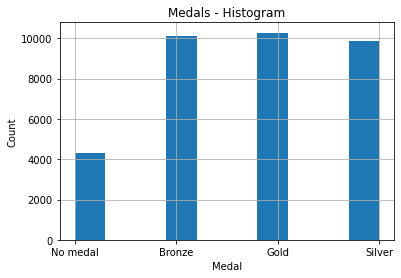

In [298]:
df['Medal'].hist()
plt.title("Medals - Histogram")
plt.xlabel("Medal")
plt.ylabel("Count")
plt.show()

Outra forma também de analisar essa coluna: 

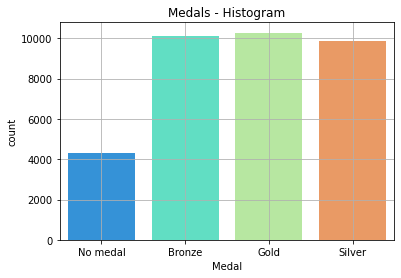

In [299]:
sns.countplot(x='Medal', data=df, palette = "rainbow")
plt.title("Medals - Histogram")
plt.grid()
plt.show()

Com isso, percebemos que a maioria dos dados coletados foram de pessoas que conseguiram medalhas nas olímpiadas. Porém, em geral, muitas pessoas participam das olímpiadas e, geralmente, somente três delas conseguem a medalha (o número de medalhistas podem variar de acordo com a modalidade esportiva), assim, pode-se afirmar que o foco do dataset foram pessoas que são medalhistas.

Mas será que as medalhas possuem relação com outras colunas? Para descobrir isso foi utilizado o heatmap para se ter uma visão geral.

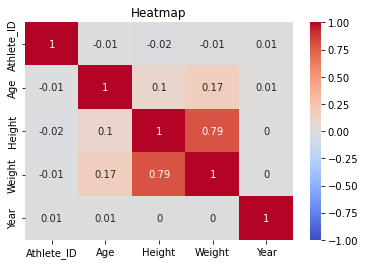

In [300]:
corr = df.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=np.round(corr.values, 2),
cmap='coolwarm') 
plt.title("Heatmap")
plt.show()

Com isso, percebeu-se que somente dados numéricos foram "plotados", logo, teremos que usar um outro método para analisarmos essa correlação de medalhas com as outras colunas.

Entretanto, nem por isso podemos dizer que esse gráfico foi inútil, pelo contrário, conseguiu-se perceber por meio dele que essa colunas não estão muito correlacionadas. Isso porque os valores deixam de estar perto de 1 e de -1, com exceção das colunas que se relacionam consigo mesmo que possuem valores iguais a 1 e as colunas correspondentes ao peso e altura. 

Essas duas colunas (peso e altura) com certeza deveriam estar relacionadas, uma vez que, de maneira geral, pessoas mais altas possuem uma massa corporal maior. 


Vamos agora, fazer uma breve pausa na parte da análise das medalhas para observar esses dados numéricos...

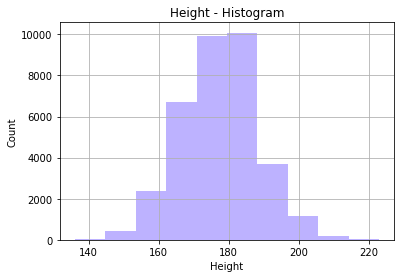

In [301]:
df['Height'].hist(color='#bdb2ff')
plt.title("Height - Histogram")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

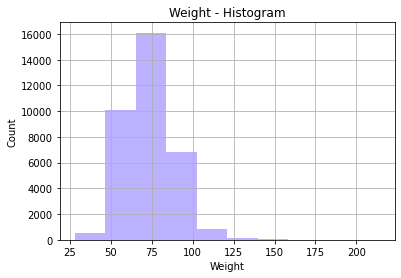

In [302]:
df["Weight"].hist(color = "#bdb2ff")
plt.title("Weight - Histogram")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

Com esses dois histogramas, conseguiu-se perceber que os dados realmente fazem sentido. Porém, percebe-se também que há dados extremos, como pessoas que pesam um valor perto de 25kg (talvez ele possa ser considerado um outlier, mas ainda assim podem existir pessoas que são tão altas e podem pesar pouco). 

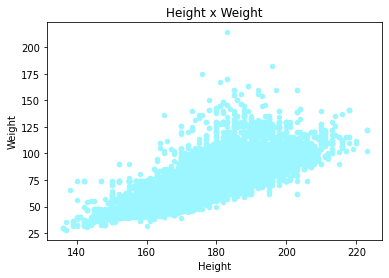

In [303]:
df.plot.scatter('Height', 'Weight', c = '#9bf6ff')
plt.title("Height x Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Já com esse gráfico, pode-se perceber que quanto mais alta a pessoa, mais ela pesa, o que ressalta o que concluimos anteriormente!

Voltando ao tema das medalhas, para tentar observar algumas correlações, vamos utilizar outro método: 

OBS.: esse código demorou muito tempo para compilar, provelmente, devido a grande quantidade de dados e gráficos a serem plotados

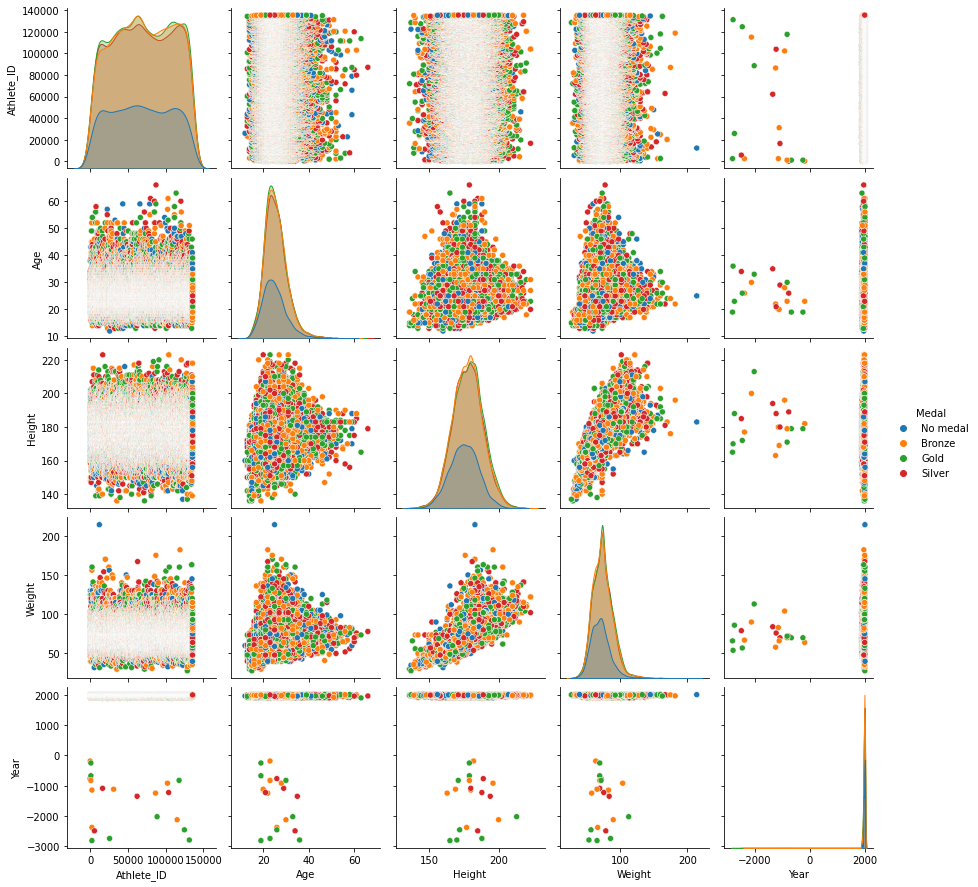

In [304]:
sns.pairplot(df, hue='Medal')
plt.show()

Focando agora em algumas colunas, começaremos pelo número de medalhas por ano.

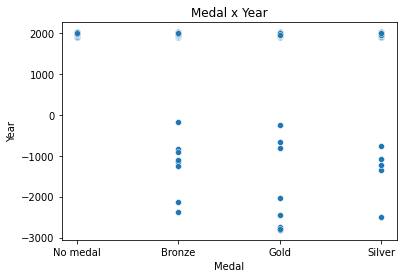

In [305]:
sns.scatterplot(x ='Medal', y = 'Year', data = df)
plt.title("Medal x Year")
plt.show()

Com esse comando, percebeu-se que há valores de anos negativos, o que não faz muito sentido... Assim, deve-se limpar esses dados (o que não foi feito anteriormente, uma vez que a média parecia correta).

Neste caso, vamos pegar anos acima de 1900.

In [306]:
df = df[df['Year'] >= 1900]

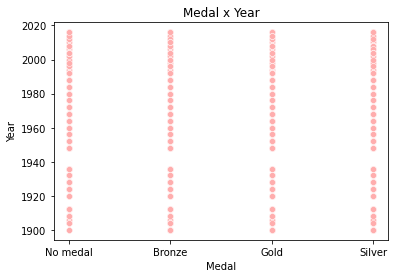

In [307]:
sns.scatterplot(x ='Medal', y = 'Year', data = df, color = "#ffadad")
plt.title("Medal x Year")
plt.show()

Ainda assim, não conseguimos perceber uma relação clara... 

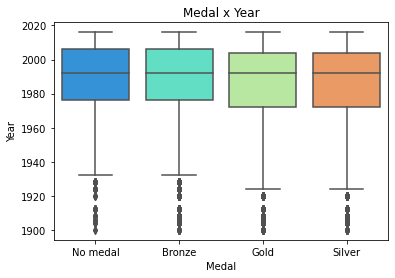

In [308]:
sns.boxplot(x='Medal', y = 'Year', data=df, palette = "rainbow")
plt.title("Medal x Year")
plt.show()

Com o boxplot, conseguimos perceber algumas coisas, como por exemplo, a grande maioria dos dados no dataset estão entre 1980 e 2010 aproximadamente, além disso, percebe-se que a média das medalhas (ou sem medalhas) são praticamente as mesmas, isto é perto de 1990, o que condiz com a média que tínhamos obtido anteriormente (1984), entretanto, como excluimos os dados abaixo de 1900, isso explica porque a média aumentou.

Vamos agora ver se há alguma relação entre medalhas e o gênero: 

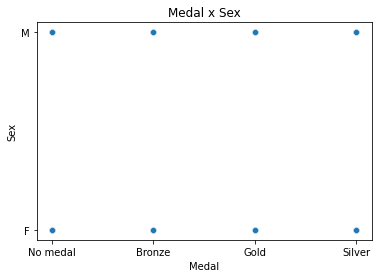

In [309]:
sns.scatterplot(x ='Medal', y = 'Sex', data = df)
plt.title("Medal x Sex")
plt.show()

Novamente, percebe-se que não consegue-se obter uma boa relação dessa forma. 

In [310]:
#sns.boxplot(x='Medal', y = 'Sex', data=df, palette = "gist_rainbow")
#plt.title("Medal x Sex")
#plt.show()

Ao tentar plotar um gráfico boxplot, percebeu-se também que ele só funciona se uma das variáveis for numérica, o que faz sentido, uma vez que é calculada a média e outros cálculos numéricos.

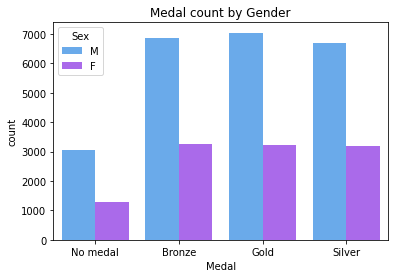

In [311]:
sns.countplot(x='Medal', hue = 'Sex', data=df, palette = "cool")
plt.title("Medal count by Gender")
plt.show()

Agora com esse gráfico de barras, finalmente conseguimos obter algum resultado!! Pode-se perceber que há mais homens conseguindo medalhas, o que traz uma outra reflexão: nas olimpíadas, os jogos não separados pelo gênero? Isto é, mulheres competem entre si e homens entre si também? 


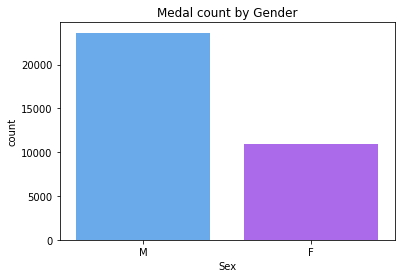

In [312]:
sns.countplot(x = 'Sex', data = df, palette = "cool")
plt.title("Medal count by Gender")
plt.show()

Com esse gráfico, pode-se concluir que tal discrepância entre homens e mulheres ganhando medalhas é devido ao fato que há mais dados de homens do que de mulheres em nosso dataset, em que o número de dados sobre mulheres é praticamente a metade dos obtidos para os homens.

Além disso, também podemos fazer um gráfico de "pizza" com esses dados!

[]

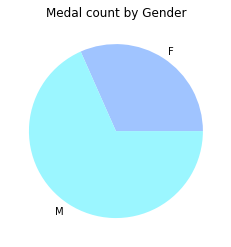

In [313]:
plt.pie(df.groupby("Sex")["Medal"].count(), labels = ["F", "M"], colors = ["#a0c4ff", "#9bf6ff"])
plt.title("Medal count by Gender")
plt.plot()

Agora, vamos analisar a relação entre medalhas e a idade:

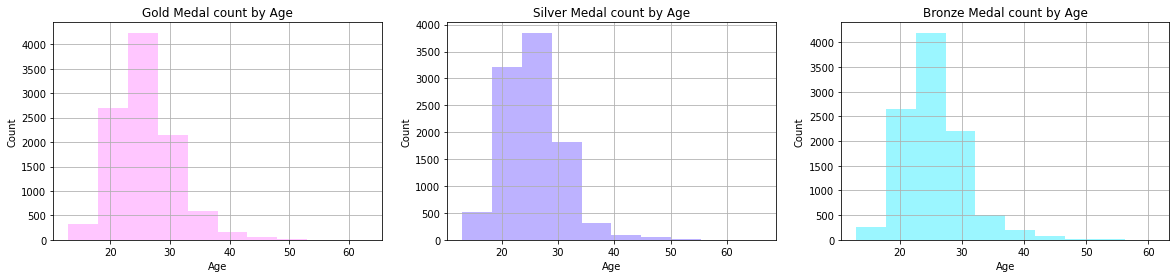

In [368]:
fig = plt.figure(figsize = (20, 4))
plt.subplot(1,3,1)
df[df["Medal"] == "Gold"]["Age"].hist(color = "#ffc6ff")
plt.title("Gold Medal count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(1,3,2)
df[df["Medal"] == "Silver"]["Age"].hist(color = "#bdb2ff")
plt.title("Silver Medal count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(1,3,3)
df[df["Medal"] == "Bronze"]["Age"].hist(color = "#9bf6ff")
plt.title("Bronze Medal count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Com os gráficos acima, pode-se perceber que independente do tipo de medalha, a maioria dos atletas que conseguem medalha estão próximos de 25 anos.

Fazendo análise de medalhas com a coluna de times: 

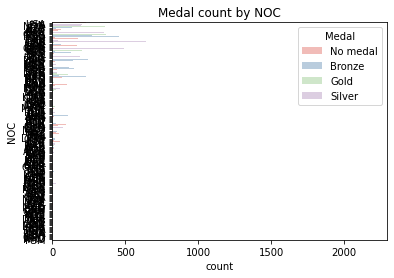

In [314]:
sns.countplot(y = 'NOC', hue = "Medal", data = df, palette = "Pastel1")
plt.title("Medal count by NOC")
plt.show()

Com esse gráfico percebeu-se que há muitos comitês olímpicos, assim, seria interessante reagrupar e plotar no gráfico os comitês mais relevantes, por exemplo, os que mais possuem medalhas.

In [315]:
df_NOC_Medal_Sorted = df.groupby(['NOC', 'Medal']).count().sort_values("Athlete_ID", ascending = False)

In [316]:
df_NOC_Medal_Sorted

Athlete_ID  Name   Sex   Age  ...  Season  City  Sport  Event
NOC Medal                                 ...                            
USA Gold          2185  2185  2185  2185  ...    2185  2185   2185   2185
    Silver        1283  1283  1283  1283  ...    1283  1283   1283   1283
    Bronze        1008  1008  1008  1008  ...    1008  1008   1008   1008
URS Gold           969   969   969   969  ...     969   969    969    969
    Silver         639   639   639   639  ...     639   639    639    639
...                ...   ...   ...   ...  ...     ...   ...    ...    ...
HAI Silver           1     1     1     1  ...       1     1      1      1
HKG Bronze           1     1     1     1  ...       1     1      1      1
    Gold             1     1     1     1  ...       1     1      1      1
IOA Gold             1     1     1     1  ...       1     1      1      1
GAB Silver           1     1     1     1  ...       1     1      1      1

[525 rows x 13 columns]

Com isso, conseguimos descobrir quais são os comitês que mais possuem medalhas e quantas medalhas de cada tipo. 

Para conseguirmos plotar, será necessário transformar os "index" em colunas para poder acessá-los. Além disso, será utilizado esses valores numéricos para saber quantas medalhas há de cada tipo em cada comitê, dessa forma, renomear ao menos uma coluna que será utilizada é um bom passo. 

In [317]:
df_NOC_Medal_Sorted.reset_index(level=["NOC", "Medal"], inplace=True)

Para verificar as colunas: 

In [318]:
df_NOC_Medal_Sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         525 non-null    object
 1   Medal       525 non-null    object
 2   Athlete_ID  525 non-null    int64 
 3   Name        525 non-null    int64 
 4   Sex         525 non-null    int64 
 5   Age         525 non-null    int64 
 6   Height      525 non-null    int64 
 7   Weight      525 non-null    int64 
 8   Team        525 non-null    int64 
 9   Games       525 non-null    int64 
 10  Year        525 non-null    int64 
 11  Season      525 non-null    int64 
 12  City        525 non-null    int64 
 13  Sport       525 non-null    int64 
 14  Event       525 non-null    int64 
dtypes: int64(13), object(2)
memory usage: 61.6+ KB


Renomeando uma das colunas:

In [319]:
df_NOC_Medal_Sorted = df_NOC_Medal_Sorted.rename(columns={'Athlete_ID': 'Count'})

Feito isso, finalmente será possível fazer um gráfico:

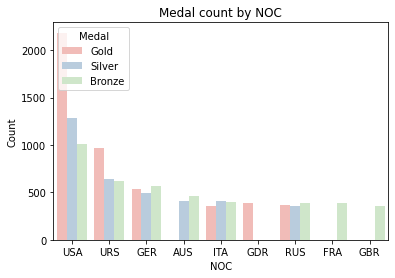

In [320]:
sns.barplot(x='NOC', y='Count', hue = "Medal", data=df_NOC_Medal_Sorted.iloc[0:20], palette='Pastel1')
plt.title("Medal count by NOC")
plt.show()

Com esse gráfico, assim como visto anteriormente quando o dataset foi ordenado, conseguimos perceber quais são os comitês olímpicos que mais possuem medalhas e quantas delas são de ouro, prata e bronze. Os Estados Unidos, por exemplo, é o comitê que mais possui medalhas, sendo a maioria de ouro, seguido de prata e bronze. Enquanto que a Rússia está em segundo lugar em número total de medalhas e a Austrália, está em quarto lugar, mas não possui nenhuma medalha de ouro e assim por diante.

Para continuar a análise, também podemos ver a relação entre medalhas e temporada:

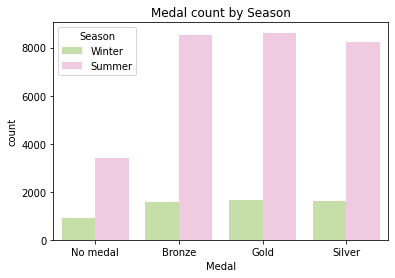

In [321]:
sns.countplot(x='Medal', hue = 'Season', data=df, palette = "PiYG_r")
plt.title("Medal count by Season")
plt.show()

A partir do gráfico, é possível confirmar que há mais medalhas em temporadas de inverno, o que pode ser confirmado abaixo.

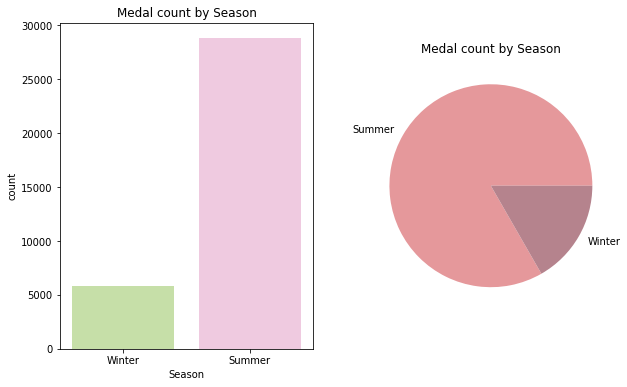

In [322]:
fig = plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Season', data = df, palette = "PiYG_r")
plt.title("Medal count by Season")
plt.subplot(1, 2, 2)
plt.pie(df.groupby("Season")["Medal"].count(), labels = ["Summer", "Winter"], colors = ["#e5989b", "#b5838d"])
plt.title("Medal count by Season")
plt.show()

Dessa forma, é possível dizer que foram analisados mais casos em temporadas de verão no dataset.

In [323]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,No medal
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
5,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
6,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
7,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


Voltando a dar uma olhada geral no dataset, percebe-se que há uma relação entre a coluna "Games", "Year" e "Season": na primeira linha, por exemplo, temos que na coluna "Games" tem-se "1992 Winter" e o valor "1992" está presenta na coluna "Year", enquanto "Winter" está na coluna "Season".

Dessa forma, como já foram analisados a relação de medalhas com o ano e a temporada, ao analisar a relação entre medalhas e essa coluna só iriamos descobrir em quais Jogos houveram mais dados. De acordo com as análises anteriores, provavelmente teremos mais dados perto de 1990 e da temporada de verão, mas para verificar isso, vamos fazer os gráficos.

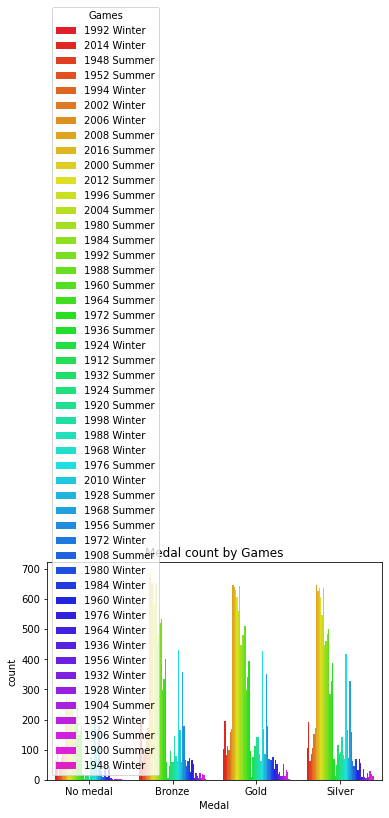

In [324]:
sns.countplot(x='Medal', hue = 'Games', data=df, palette = "gist_rainbow")
plt.title("Medal count by Games")
plt.show()

Novamente, temos um caso em que há muitos Jogos, logo, seria interessante repetir o processo que foi feito na análise com os comitês olímpicos.

In [325]:
df_Games_Sorted = df.groupby(['Games', 'Medal']).count().sort_values("Athlete_ID", ascending = False)

In [326]:
df_Games_Sorted

,,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event
Games,Medal,,,,,,,,,,,,,
2016 Summer,Bronze,687,687,687,687,687,687,687,687,687,687,687,687,687
2008 Summer,Bronze,673,673,673,673,673,673,673,673,673,673,673,673,673
2012 Summer,Bronze,657,657,657,657,657,657,657,657,657,657,657,657,657
2004 Summer,Bronze,653,653,653,653,653,653,653,653,653,653,653,653,653
2000 Summer,Bronze,651,651,651,651,651,651,651,651,651,651,651,651,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948 Winter,No medal,2,2,2,2,2,2,2,2,2,2,2,2,2
1900 Summer,No medal,2,2,2,2,2,2,2,2,2,2,2,2,2
1928 Winter,No medal,1,1,1,1,1,1,1,1,1,1,1,1,1


Antes de fazer o gráfico, percebe-se que há uma maior quantidade de medalhas de bronze nas temporadas de verão de anos entre 2000 e 2016. Entretanto, seria mais interessante obtermos o total de medalhas (neste caso, seria a soma das medalhas de ouro, prata e bronze e as que não possuem medalhas, isto é, somaremos o total de linhas para cada Jogo) para cada Jogo, uma vez que apenas queremos saber qual deles possuem mais dados no dataset.

In [327]:
df_Games_Medals_Sorted = df.groupby(['Games']).count().sort_values("Athlete_ID", ascending = False)

In [328]:
df_Games_Medals_Sorted

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
Games,,,,,,,,,,,,,,
2016 Summer,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228
2008 Summer,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225,2225
2004 Summer,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182
2000 Summer,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178,2178
2012 Summer,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146,2146
1996 Summer,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938
1988 Summer,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
1992 Summer,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691
1984 Summer,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611


In [329]:
df_Games_Medals_Sorted.reset_index(level=["Games"], inplace=True)

In [330]:
df_Games_Medals_Sorted = df_Games_Medals_Sorted.rename(columns={'Athlete_ID': 'Count'})

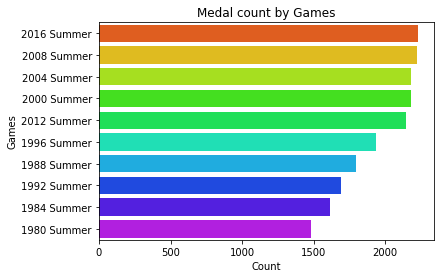

In [331]:
sns.barplot(x='Count', y='Games', data=df_Games_Medals_Sorted.iloc[0:10], palette='gist_rainbow')
plt.title("Medal count by Games")
plt.show()

Dessa forma, finalmente podemos concluir que temos realmente mais jogos nas temporadas de verão com uma certa concentração em jogos que ocorrem perto de 2000.

Vamos analisar também a relação das medalhas com as modalidades esportivas! Seguindo os passos anteriores, seria interessante saber quais foram as modalidades que mais tiveram medalhas no dataset.

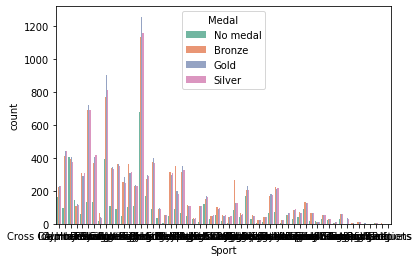

In [332]:
sns.countplot(x='Sport', hue = 'Medal', data=df, palette = "Set2")
plt.show()

Como são muitas modalidades esportivas, vamos fazer o mesmo procedimento feito anteriormente.

In [333]:
df_Sport_Sorted = df.groupby(['Sport']).count().sort_values("Athlete_ID", ascending = False)

In [334]:
df_Sport_Sorted

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Athletics,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236,4236
Swimming,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880,2880
Rowing,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238
Gymnastics,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576
Ice Hockey,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395
Fencing,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329,1329
Hockey,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Football,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
Canoeing,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131


In [335]:
df_Sport_Sorted.reset_index(level=["Sport"], inplace=True)
df_Sport_Sorted = df_Sport_Sorted.rename(columns={'Athlete_ID': 'Count'})

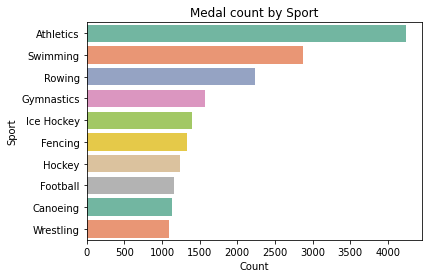

In [336]:
sns.barplot(x='Count', y='Sport', data=df_Sport_Sorted.iloc[0:10], palette='Set2')
plt.title("Medal count by Sport")
plt.show()

Dessa forma, pode-se perceber que a modalidade que mais possui medalhas é o atletismo com mais de 4000 medalhas, seguido pela natação com pouco menos de 3000 medalhas.

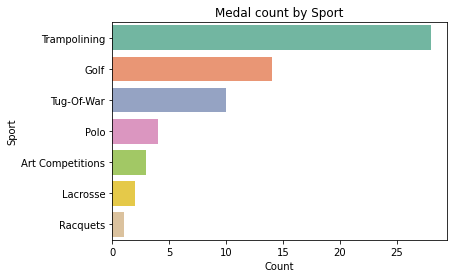

In [337]:
sns.barplot(x='Count', y='Sport', data=df_Sport_Sorted.iloc[50:], palette='Set2')
plt.title("Medal count by Sport")
plt.show()

Pegando as modalidades com menos medalhas, percebemos que essas modalidades possuem menos de 30 medalhas no dataset e são menos conhecidas que as apresentadas no gráfico anterior.

Podemos ainda fazer mais uma análise interessante: a relação entre medalhas e os atletas, assim podemos descobrir quais são os atletas que mais possuem medalhas em nosso dataset.

In [338]:
df_Athlete_Sorted = df.groupby(['Name']).count().sort_values("Athlete_ID", ascending = False)

In [339]:
df_Athlete_Sorted

,Athlete_ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,,,,,,,,,,,,,,
"Michael Fred Phelps, II",28,28,28,28,28,28,28,28,28,28,28,28,28,28
Larysa Semenivna Latynina (Diriy-),17,17,17,17,17,17,17,17,17,17,17,17,17,17
Nikolay Yefimovich Andrianov,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Borys Anfiyanovych Shakhlin,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Takashi Ono,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"James Howard ""Jim"" Blair",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"James Henry ""Jim"" Duncan",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"James Hawley ""Jim"" Hunt",1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [340]:
df_Athlete_Sorted.reset_index(level=["Name"], inplace=True)
df_Athlete_Sorted = df_Athlete_Sorted.rename(columns={'Athlete_ID': 'Count'})

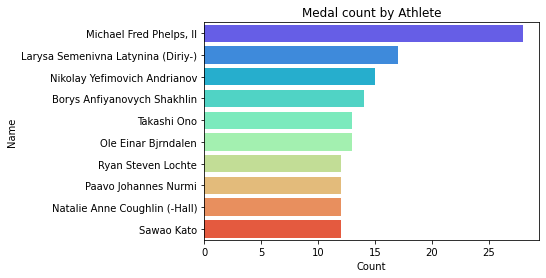

In [341]:
sns.barplot(x='Count', y='Name', data=df_Athlete_Sorted.iloc[0:10], palette='rainbow')
plt.title("Medal count by Athlete")
plt.show()

Com isso, podemos descobrir quais foram os atletas que mais conseguiram medalhas (em nosso dataset).

## Conclusão

A partir das análises anteriores sobre o dataset acerca de dados obtidos de olimpíadas anteriores, conseguimos obter algumas conclusões. 

Conseguimos obter quais são os tipos de dados predominantes no dataset, por exemplo, que há mais dados sobre homens do que de mulheres, assim como há mais olimpíadas ocorrendo no verão em um certo período de tempo. 

Além disso, foi possível confirmar a relação entre peso e altura, que sabemos pela intuição, pela análise dos dados. 

Também foi possível retirar alguns dados do dataset que podem ser relevantes para as olimpíadas, como o comitê olímpico e o atleta que mais possui medalhas e quais modalidades esportivas possuem mais medalhas em nosso dataset. A partir disso, pode-se concluir que os dados que mais possuem medalhas são os mais conhecidos, como por exemplo, a modalidade atletismo é mais famosa que Lacrosse e Michael Phelps é muito conhecido pelo mundo!
